<a href="https://colab.research.google.com/github/Ryo-Tanohata/sig_beginner9/blob/main/PyCaret_beginner9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://openstandia.jp/oss_info/pycaret/

#データの取得

In [1]:
#signate_begginer9.zipをGoogle Drive からひっぱってくるやつ
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
 
auth.authenticate_user()
 
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate_begginer9.zip'", fields="files(id)").execute()
signate_api_key = results.get('files', [])
 
filename = "/content/input/signate_begginer9.zip"
os.makedirs(os.path.dirname(filename), exist_ok=True)
 
request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [2]:
import os
path="./input"
zip_files=os.listdir(path)
zip_files

['signate_begginer9.zip']

In [3]:
import zipfile
for i in zip_files:
    if ".zip" in i:
        with zipfile.ZipFile("input/"+i) as existing_zip:
            print(f'open {i}')
            existing_zip.extractall('input')
            print("extract")
    else:
        continue

open signate_begginer9.zip


In [4]:
import os
datapath=[]
for dirname, dirpaths, filenames in os.walk('input'):
    for filename in filenames:
        datapath.append(dirname+'/'+filename)
datapath

['input/test.csv',
 'input/train.csv',
 'input/signate_begginer9.zip',
 'input/sample_submission.csv']

In [9]:
import pandas as pd
databox={}
for i in datapath:
    if '.tsv' in i:
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i, sep='\t', index_col=0)}
    elif  ('train' in i) or ('test' in i):
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i)}
    elif '.csv' in i:
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i, header=None)}
    databox.update(data)
databox.keys()

dict_keys(['test', 'train', 'sample_submission'])

#PyCret

In [6]:
pip install -q pycaret

     |████████████████████████████████| 266kB 5.6MB/s 
     |████████████████████████████████| 6.8MB 11.1MB/s 
     |████████████████████████████████| 245kB 41.5MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 215kB 37.9MB/s 
     |████████████████████████████████| 2.0MB 39.4MB/s 
     |████████████████████████████████| 112kB 46.2MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 1.7MB 38.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.2MB 50.7MB/s 
     |████████████████████████████████| 276kB 54.7MB/s 
     |████████████████████████████████| 1.1MB 38.4MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 3.2MB 32.3MB/s 

In [10]:
train=databox['train']
test=databox['test']
sub=databox['sample_submission']

In [11]:
train.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0


関数setup()にこのデータセットと目的変数のラベル名を与えると、データ型の推定と変換や欠損値の補填、カテゴリー変数のエンコーディングなどを自動的に行います。

In [12]:
from pycaret.classification import *
setup(data = train, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


(False,
 StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 [],
 10,
 <MLUsecase.CLASSIFICATION: 1>,
 131    0
 203    1
 50     0
 585    0
 138    1
       ..
 598    1
 458    0
 586    0
 178    0
 498    0
 Name: target, Length: 301, dtype: int64,
 False,
 {'Bagging': <pycaret.containers.models.classification.BaggingClassifierContainer at 0x7fae2e0f7c90>,
  'CalibratedCV': <pycaret.containers.models.classification.CalibratedClassifierCVContainer at 0x7fae2586fd10>,
  'Stacking': <pycaret.containers.models.classification.StackingClassifierContainer at 0x7fae2e115190>,
  'Voting': <pycaret.containers.models.classification.VotingClassifierContainer at 0x7fae2e0ff450>,
  'ada': <pycaret.containers.models.classification.AdaBoostClassifierContainer at 0x7fae2e1153d0>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7fae2e0fd6d0>,
  'et': <pycaret.containers.models.classification.ExtraTreesClassifierContainer at 0x7fae2e0f7fd0>,
  'gbc

そして、このようにデータの行数、特徴量の数、訓練データとテストデータの件数などを表示します。

関数compare_models()を呼び出すと、すべてのモデルを比較して、それぞれの精度を高い順に表示します。

In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8470,0.8627,0.2940,0.8093,0.4233,0.3573,0.4215,0.519
lightgbm,Light Gradient Boosting Machine,0.8398,0.8468,0.4319,0.6468,0.4993,0.4112,0.4320,0.123
gbc,Gradient Boosting Classifier,0.8369,0.8504,0.3978,0.6369,0.4794,0.3909,0.4104,0.169
et,Extra Trees Classifier,0.8341,0.8667,0.2929,0.6926,0.3975,0.3216,0.3674,0.469
ada,Ada Boost Classifier,0.8098,0.7907,0.3533,0.5505,0.4127,0.3079,0.3274,0.126
ridge,Ridge Classifier,0.8083,0.0000,0.1104,0.5500,0.1777,0.1227,0.1748,0.022
qda,Quadratic Discriminant Analysis,0.8054,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.022
lr,Logistic Regression,0.8026,0.6496,0.0291,0.2333,0.0508,0.0272,0.0460,0.320
lda,Linear Discriminant Analysis,0.8011,0.7518,0.1841,0.4549,0.2567,0.1701,0.1932,0.024
dt,Decision Tree Classifier,0.7939,0.6690,0.4643,0.4787,0.4670,0.3410,0.3432,0.023


この関数は、モデルライブラリー内のすべてのモデルを学習し、メトリック評価のための層化交差検証を使用してそれらをスコアリングします。 出力は、学習時間とともに、精度、AUC、再現率、適合率、F1、Kappa、およびMCCを出力します。ここでは、LDAが最も高い精度を出したので、変数best_modelにはLDAのモデルオブジェクトが代入されます。

ハイパーパラメーターをチューニングするには、関数tune_model()を使用します。

In [20]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8596,0.2308,1.0000,0.3750,0.3282,0.4431
1,0.8571,0.8266,0.3846,0.7143,0.5000,0.4253,0.4531
2,0.8286,0.8698,0.2308,0.6000,0.3333,0.2566,0.2955
3,0.8143,0.8584,0.2143,0.6000,0.3158,0.2353,0.2774
4,0.8857,0.9241,0.4286,1.0000,0.6000,0.5455,0.6124
5,0.8429,0.7679,0.3571,0.7143,0.4762,0.3956,0.4286
6,0.8429,0.9005,0.3571,0.7143,0.4762,0.3956,0.4286
7,0.8429,0.8929,0.2143,1.0000,0.3529,0.3038,0.4232
8,0.8286,0.8444,0.2143,0.7500,0.3333,0.2683,0.3385
9,0.8696,0.8826,0.3077,1.0000,0.4706,0.4191,0.5149


In [21]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.7065,0.3077,0.4444,0.3636,0.2496,0.2556
1,0.8286,0.6606,0.3077,0.5714,0.4000,0.3103,0.3306
2,0.8143,0.8104,0.3846,0.5000,0.4348,0.3259,0.3299
3,0.8143,0.6945,0.2143,0.6000,0.3158,0.2353,0.2774
4,0.8143,0.8042,0.2857,0.5714,0.3810,0.2857,0.3095
5,0.8143,0.6186,0.4286,0.5455,0.4800,0.3689,0.3729
6,0.8000,0.6741,0.2857,0.5000,0.3636,0.2553,0.2694
7,0.8143,0.6652,0.0714,1.0000,0.1333,0.1096,0.2408
8,0.8143,0.6633,0.1429,0.6667,0.2353,0.1772,0.2469
9,0.8406,0.7788,0.2308,0.7500,0.3529,0.2900,0.3563


この関数は、ランダムグリッドサーチを使用してモデルのハイパーパラメーターを自動的に調整します。出力は、モデルの最高の精度、AUC、再現率、適合率、F1、kappa、およびMCCを出力します。

PyCaretは主要なグラフの表示も簡単にできます。例えば、ROC曲線は以下のようなコードで表示できます。

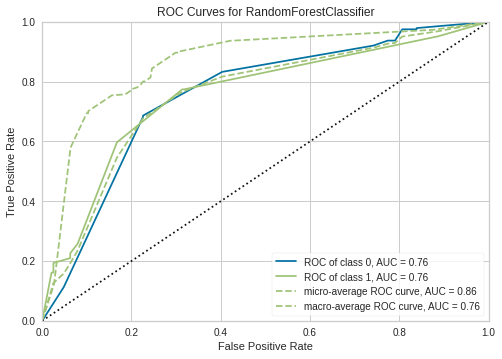

In [22]:
plot_model(tuned_rf, plot = 'auc')

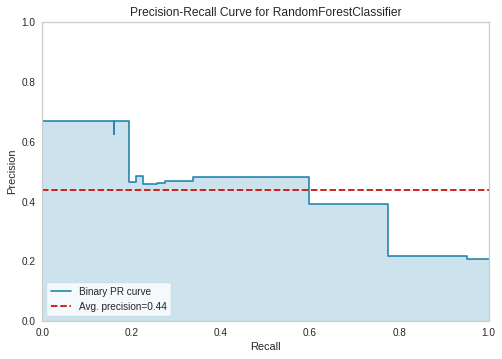

In [23]:
plot_model(tuned_model, plot = 'pr')

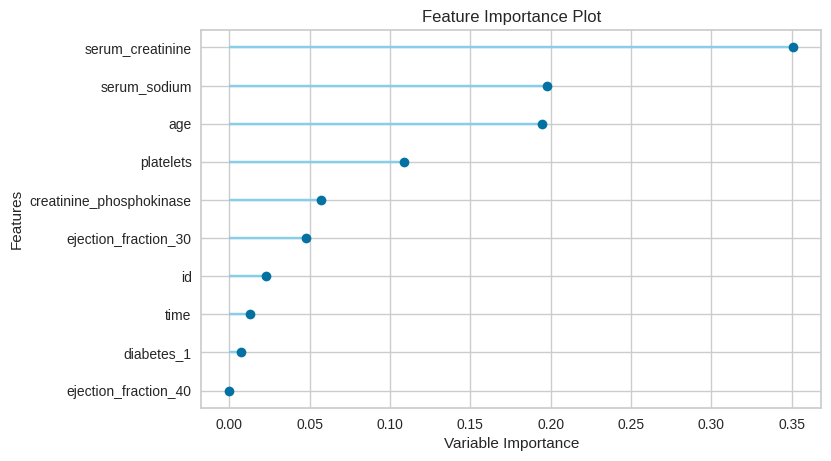

In [17]:
plot_model(tuned_model, plot='feature')

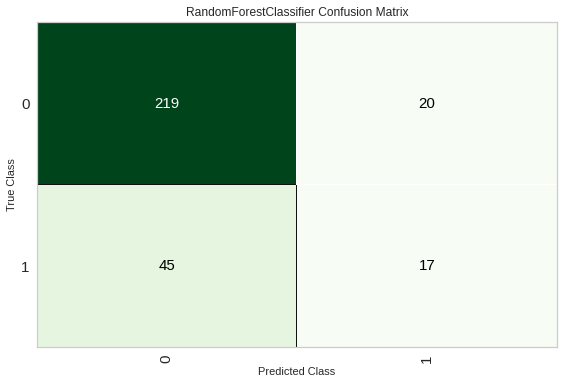

In [18]:
plot_model(tuned_model, plot = 'confusion_matrix')